<a href="https://colab.research.google.com/github/Mi-n-Seong/Mi-n-Seong/blob/main/%5BAI2025_Assignment%5D_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [11]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [12]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [13]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [14]:
model = tf.keras.models.Sequential([

    # Convolutional layer. Learn 64 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(
        64, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),

    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Convolutional layer. Learn 128 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),

    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Convolutional layer. Learn 246 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),

    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    # Flatten units
    tf.keras.layers.Flatten(),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    # Add an output layer with output units for all 10 digits
    tf.keras.layers.Dense(10, activation="softmax")
])


# Compile and Train neural network

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.3419 - loss: 2.1148 - val_accuracy: 0.5580 - val_loss: 1.2258
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.5678 - loss: 1.2353 - val_accuracy: 0.6910 - val_loss: 0.8734
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6598 - loss: 0.9910 - val_accuracy: 0.7070 - val_loss: 0.8679
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7087 - loss: 0.8495 - val_accuracy: 0.7274 - val_loss: 0.8137
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7464 - loss: 0.7462 - val_accuracy: 0.7688 - val_loss: 0.6746
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7726 - loss: 0.6780 - val_accuracy: 0.7870 - val_loss: 0.6535
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8028 - loss: 0.5923 - val_accuracy: 0.7898 - val_loss: 0.6601
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8180 - loss: 0.5439 - 

## Evaluate neural network performance


In [16]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 3s - 10ms/step - accuracy: 0.8384 - loss: 0.6470


[0.6470446586608887, 0.8384000062942505]

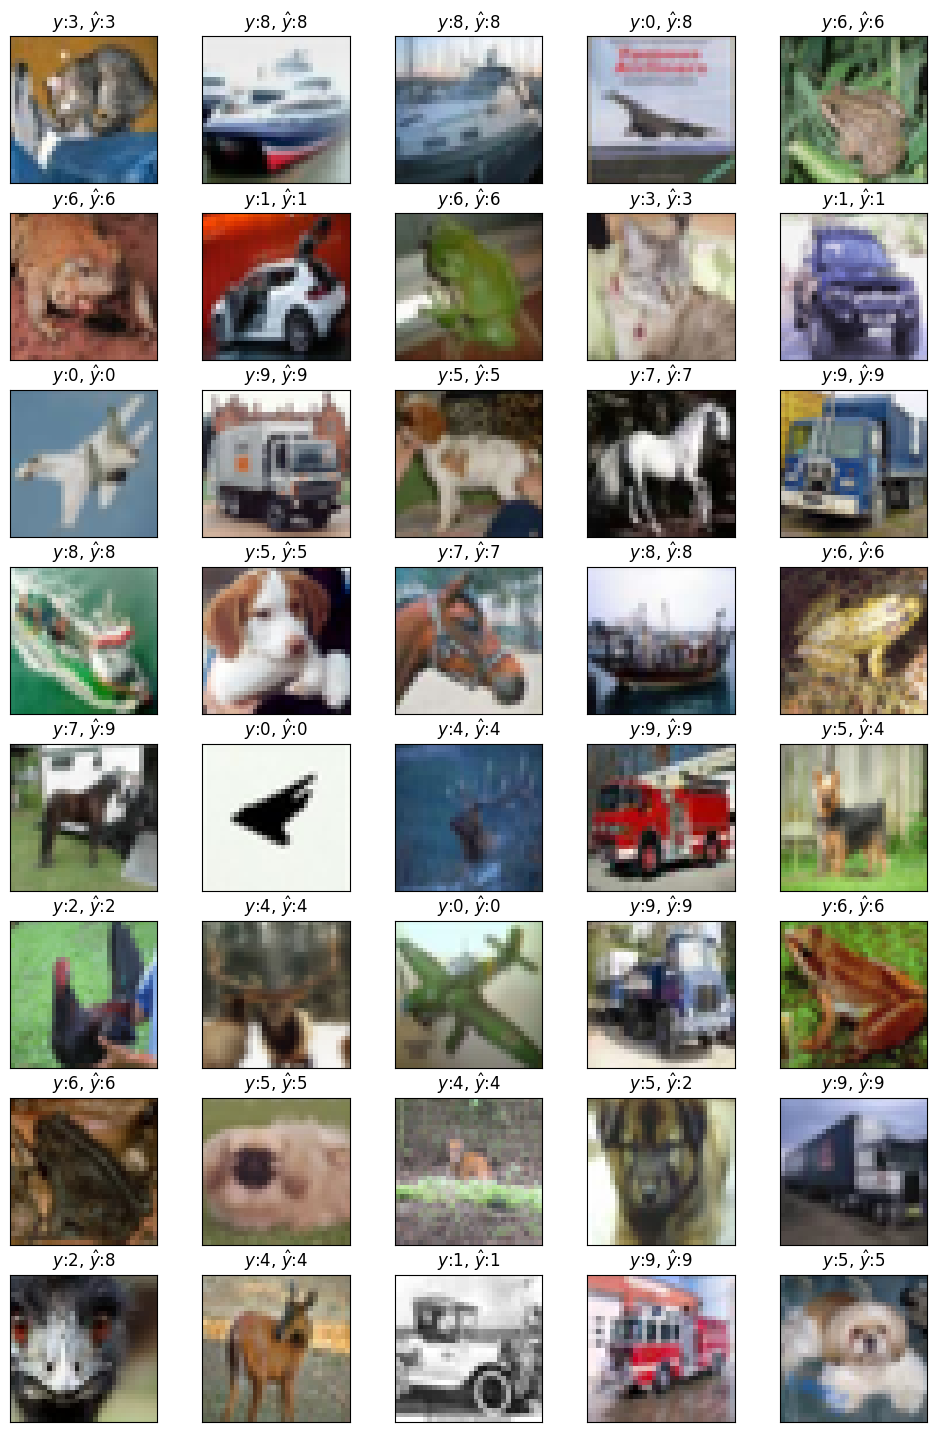

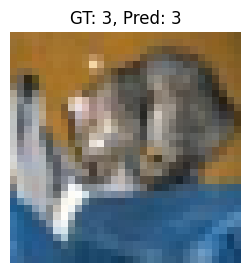

In [20]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()

idx = 0

true_label = tf.argmax(y_test[idx]).numpy()
pred_label = pred[idx].numpy()

plt.figure(figsize=(3, 3))
plt.imshow(x_test[idx])
plt.axis("off")
plt.title(f"GT: {true_label}, Pred: {pred_label}")
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [18]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8384000062942505
